In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def numerovIntegrationScheme(g, s, y0, y1, deltaX):
    """
    Numerov integeration scheme to solve
    second-order differential equation in general form:    
    d^2 y / d x^2 = -g(x) * y(x) + s(x)
    Assume regular mesh x0, x1, ..., xN
    Inputs: 
    g - array of [g(x0), g(x1), ..., g(xN)]
    s - array of [s(x0), s(x1), ..., s(xN)]
    y0, y1 - intial conditions y(x0), y(x1)
    deltaX - interval size of the mesh 
    Outpus:
    y - array of solution [y(x0), y(x1), ..., y(xN)]
    """
    meshSize = len(g)
    errorMessage = "ERROR: Inconsisten in the input data"
    assert meshSize == len(s), errorMessage
    
    f = 1 + g * (deltaX)**2 / 12.0
    y = np.zeros(meshSize)
    y[0] = y0
    y[1] = y1
    for i in range(1, meshSize-1):
        # Preventing zero division
        if f[i+1] == 0: 
            f[i+1] = 1E-10
        y[i+1] = ((12.0 - 10.0 * f[i]) * y[i] - f[i-1] * y[i-1]
                  + (s[i+1] + 10 * s[i] + s[i-1]) * deltaX**2 / 12.0) / f[i+1]
    return y

In [3]:
def harmonicPotential(x):
    """
    Function that describes harmonic potential
    """
    return x**2 / 2.0

In [4]:
def howManyNodes(y):  # возвращает число узлов функции
    """
    Returns number of y function nodes
    """
    numberOfNodes = 0
    meshSize = len(y)
    for i in range(meshSize-1):
        if y[i] * y[i+1] < 0:
            numberOfNodes += 1
    return numberOfNodes

In [5]:
def shootingMethod(mesh, potential, numberOfNodes, minEnergy=0.0, maxEnergy=100.0,
                   tolerance=1E-5, verbose=False):
    """
    Inputs:
    Ouputs:
    """        
    if verbose:
        print("Shooting Method...")
        print("(Number of iterations)(Energy)(Current number of half nodes)(Target number of half nodes)")
        
    deltaX = mesh[1] - mesh[0]
    # Solving equation only in the x > 0 semi-axis
    halfNumberOfNodes = int(numberOfNodes / 2)
    numberOfIterations = 0
    while True:
        numberOfIterations += 1
        energy = (minEnergy + maxEnergy) / 2.0
        g = 2.0 * (energy - potential(mesh))
        s = np.zeros(len(g))             
        if numberOfNodes % 2 == 0:        
            y0 = 1.0
            f0 = 1 + g[0] * deltaX**2 / 12.0
            f1 = 1 + g[1] * deltaX**2 / 12.0
            y1 = ((12.0 - 10.0 * f0) * y0) / (2.0 * f1)
        else:
            y0 = 0.0
            y1 = deltaX            
        y = numerovIntegrationScheme(g, s, y0, y1, deltaX)
        
        if numberOfNodes ==7 and energy == 6.25:
            energy_bad = energy
            y_bad = y
            
        if numberOfNodes ==7 and abs(energy - 7.5) > 0.001:
            energy_close = energy
            y_close = y
            
        if verbose:
            formatString = "{0:10d}\t{1:10.10f}\t{2:10d}\t{3:10d}" 
            print(formatString.format(numberOfIterations, energy, 
                                      howManyNodes(y), halfNumberOfNodes))
            
        if howManyNodes(y) > halfNumberOfNodes:
            maxEnergy = energy
        else:
            minEnergy = energy            
        if abs(maxEnergy - minEnergy) < tolerance:
            break
            
    if numberOfNodes == 7:
        return energy, y, energy_bad, y_bad, energy_close, y_close
    else:
        return energy, y

In [6]:
def getWF(mesh, potential, energy, parity):
    """
    """
    deltaX = mesh[1] - mesh[0]
    g = 2.0 * (energy - potential(mesh))    
    s = np.zeros(len(g))
    if parity == 'even':        
        y0 = 1.0
        f0 = 1 + g[0] * deltaX**2 / 12.0
        f1 = 1 + g[1] * deltaX**2 / 12.0
        y1 = ((12.0 - 10.0 * f0) * y0) / (2.0 * f1)
    else:
        y0 = 0.0
        y1 = deltaX        
    y = numerovIntegrationScheme(g, s, y0, y1, deltaX)
    return y

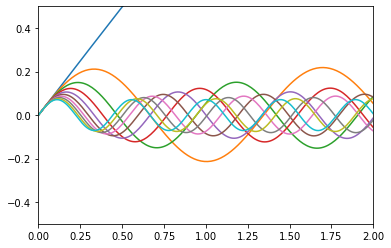

In [7]:
mesh = np.linspace(0, 10, 1000)   #  сетка
for energy in  np.linspace(0.1, 100, 10):
    y = getWF(mesh, harmonicPotential, energy, 'odd')
    plt.plot(mesh, y)
    plt.xlim(0, 2.0)
    plt.ylim(-0.5, 0.5)
plt.show()

Number of nodes = 2, Energy = 2.5000035762786865


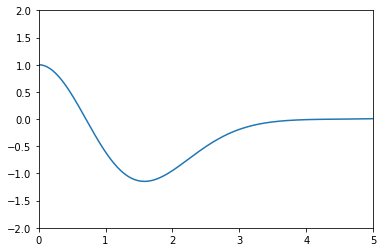

In [8]:
numberOfNodes = 2
energy, y = shootingMethod(mesh, harmonicPotential, numberOfNodes, minEnergy = 0.0, maxEnergy = 100.0, tolerance=1E-5)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
plt.plot(mesh, y)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 5.0)
plt.ylim(-2, 2)
plt.show()

Number of nodes = 5, Energy = 5.500000715255737


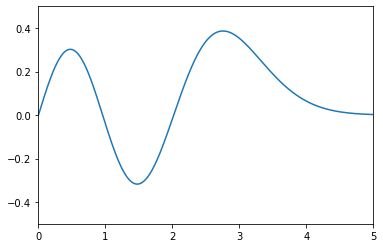

In [9]:
numberOfNodes = 5
energy, y = shootingMethod(mesh, harmonicPotential, numberOfNodes, 
                           minEnergy=0.0, maxEnergy=100.0, tolerance=1E-5)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
plt.plot(mesh, y)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 5.0)
plt.ylim(-0.5, 0.5)
plt.show()

Number of nodes = 6, Energy = 6.499999761581421


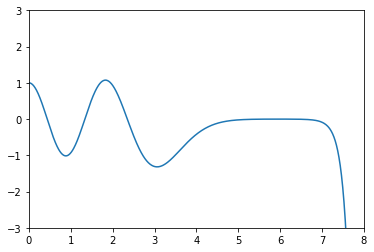

In [10]:
numberOfNodes = 6
energy, y = shootingMethod(mesh, harmonicPotential, numberOfNodes, 
                           minEnergy=0.0, maxEnergy=100.0, tolerance=1E-5)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
plt.plot(mesh, y)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-3, 3)
plt.show()

In [11]:
def getTurningPointIndex(mesh, energy, potential):
    """
    """
    meshSize = len(mesh)
    for i in range(1, meshSize-1):
        if (potential(mesh[i]) > energy):            
            return i
    return -1

In [12]:
def numerovIntegrationSchemeReverse(g, s, y0, y1, deltaX):
    """
    """
    meshSize = len(g)
    errorMessage = "ERROR: Inconsisten in the input data"
    assert meshSize == len(s), errorMessage    
    f = 1 + g * (deltaX)**2 / 12.0
    y = np.zeros(meshSize)
    y[meshSize-1] = y0
    y[meshSize-2] = y1
    for i in range(meshSize-2)[::-1]:
        # Preventing zero division
        if f[i] == 0: 
            f[i] = 1E-10
        y[i] = ((12.0 - 10.0 * f[i+1]) * y[i+1] - f[i+2] * y[i+2] 
                + (s[i+2] + 10 * s[i+1] + s[i]) * deltaX**2 / 12.0) / f[i]
    return y

In [13]:
def normalizeWF(y, deltaX):   #  нормализует ВФ
    """
    """
    meshSize = len(y)
    wfNorm = y[0]**2 * deltaX
    for i in range(1, meshSize):
        wfNorm += 2.0 * y[i]**2 * deltaX
    yNorm = y / np.sqrt(wfNorm)
    return yNorm 

In [14]:
def getFirstDerivativeDiscontinuity(y, g, deltaX, turningPointIndex):
    """
    """
    f = 1 + g * (deltaX)**2 / 12.0
    firstDerivativeDiscontinuity = (y[turningPointIndex - 1] + y[turningPointIndex + 1] 
                                    - (14.0 - 12.0 * f[turningPointIndex]) * y[turningPointIndex]) / deltaX 
    return firstDerivativeDiscontinuity

In [15]:
def stitchingMethod(mesh, potential, numberOfNodes, tolerance=1E-5, verbose=False):
    """
    """
    if verbose:
        print("Stiching Method...")
        print("(Number of iterations)(Energy)(Current number of half nodes)" 
              +"(Target number of half nodes)(Discontinuity)")
        
    deltaX = mesh[1] - mesh[0]    
    halfNumberOfNodes = int(numberOfNodes / 2)
    numberOfIterations = 0
    # Set initial lower and upper bounds to the eigenvalue
    minEnergy = min(potential(mesh))
    maxEnergy = max(potential(mesh)) 
    y = np.zeros(len(mesh))
          
    while True:
        numberOfIterations += 1
        energy = (minEnergy + maxEnergy) / 2.0
        g = 2.0 * (energy - potential(mesh))
        s = np.zeros(len(g))                               
        turningPointIndex = getTurningPointIndex(mesh, energy, potential)
        # Outward integration
        # Obtaining y on mesh[0:turningPointIndex] 
        if numberOfNodes % 2 == 0:        
            y0 = 1.0
            f0 = 1 + g[0] * deltaX**2 / 12.0
            f1 = 1 + g[1] * deltaX**2 / 12.0
            y1 = ((12.0 - 10.0 * f0) * y0) / (2.0 * f1)
        else:
            y0 = 0.0
            y1 = deltaX            
        y[:turningPointIndex+1] = numerovIntegrationScheme(g[:turningPointIndex+1],
                                                           s[:turningPointIndex+1],
                                                           y0, y1, deltaX)   
        yLeft = y[turningPointIndex]
        
        if verbose:
            formatString = "{0:10d}\t{1:10.10f}\t{2:5d}\t{3:5d}" 
            print(formatString.format(numberOfIterations, energy, 
                                      howManyNodes(y[:turningPointIndex+1]), halfNumberOfNodes))     
        
        if (howManyNodes(y[:turningPointIndex+1]) > halfNumberOfNodes):
            maxEnergy = energy
        elif (howManyNodes(y[:turningPointIndex+1]) < halfNumberOfNodes):
            minEnergy = energy
        else:
            # Inward integration 
            # Obtaining on mesh[turningPointIndex:]  
            y0 = deltaX
            y1 = deltaX       
            y[turningPointIndex:] = numerovIntegrationSchemeReverse(g[turningPointIndex:], 
                                                                    s[turningPointIndex:], y0, y1, deltaX)
            yRight = y[turningPointIndex]
            # Scaling wave function 
            y[turningPointIndex:] *= yLeft / yRight
            # Normalizing  wave fucntion
            y = normalizeWF(y, deltaX)
            # Calculate derivative discontinuity
            firstDerivativeDiscontinuity = getFirstDerivativeDiscontinuity(y, g, deltaX, turningPointIndex)                        
        
            if numberOfNodes ==7 and energy == 6.25:
                energy_bad = energy
                y_bad = y
                
            if numberOfNodes ==7 and abs(energy - 7.5) > 0.001:
                energy_close = energy
                y_close = y
            
            if verbose:               
                formatString = "{0:10d}\t{1:10.10f}\t{2:5d}\t{3:5d}\t{4:10.10f}" 
                print(formatString.format(numberOfIterations, energy, 
                                          howManyNodes(y[:turningPointIndex+1]), halfNumberOfNodes, 
                                          firstDerivativeDiscontinuity))
            
            if (firstDerivativeDiscontinuity * y[turningPointIndex] <= 0):
                minEnergy = energy
            else: 
                maxEnergy = energy  
            
            if abs(maxEnergy - minEnergy) < tolerance:
                break
                
    if numberOfNodes == 7:
        return energy, y, energy_bad, y_bad, energy_close, y_close
    else:
        return energy, y

Number of nodes = 1, Energy = 1.500004529953003


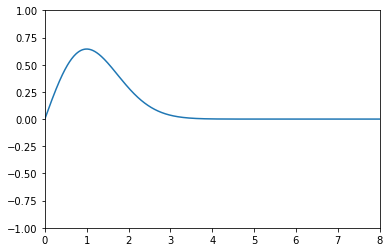

In [16]:
mesh = np.linspace(0, 10, 1000)
numberOfNodes = 1
energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
plt.plot(mesh, y)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-1, 1)
plt.show()

Number of nodes = 5, Energy = 5.500000715255737


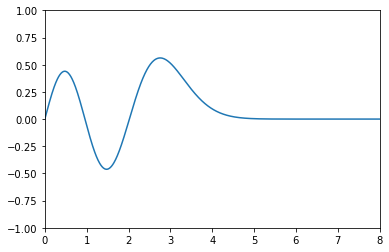

In [17]:
numberOfNodes = 5
energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
plt.plot(mesh, y)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-1, 1)
plt.show()

Number of nodes = 4, Energy = 4.500001668930054


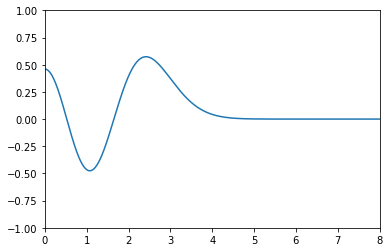

In [18]:
#### mesh = np.linspace(0, 10, 1000) 
numberOfNodes = 4
energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
plt.plot(mesh, y)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-1, 1)
plt.show()

In [19]:
def getWFNorm(y, deltaX): #  норма ВФ
    """
    """
    meshSize = len(y)
    wfNorm = y[0]**2 * deltaX
    for i in range(1, meshSize):
        wfNorm += 2.0 * y[i]**2 * deltaX    
    return wfNorm

In [20]:
numberOfNodes = 6
energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
deltaX = mesh[1] - mesh[0]
print("Wave function norm = {}".format(getWFNorm(y, deltaX)))

Wave function norm = 1.0000000000000018


In [21]:
def getClassicalProbabilityDensity(mesh, energy, potential):
    """
    Calculation of the classical probability density 
    """
    deltaX = mesh[1] - mesh[0]
    meshSize = len(mesh)
    classcialProbabilityDensity = np.zeros(meshSize)
    turningPointIndex = getTurningPointIndex(mesh, energy, potential)
    for i in range(meshSize):
        if i < turningPointIndex:
            classcialProbabilityDensity[i] = 1 / np.sqrt(energy - potential(mesh[i]))
        else:
            classcialProbabilityDensity[i] = 0
            
    probabilityNorm = 0 
    # The point at x = 0 must be count only once
    probabilityNorm += classcialProbabilityDensity[0] * deltaX
    for i in range(1, meshSize):
        probabilityNorm += 2 * classcialProbabilityDensity[i] * deltaX
    # Normalize probability denstiy 
    classcialProbabilityDensity /= probabilityNorm
    return classcialProbabilityDensity    

Number of nodes = 6, Energy = 6.499999761581421



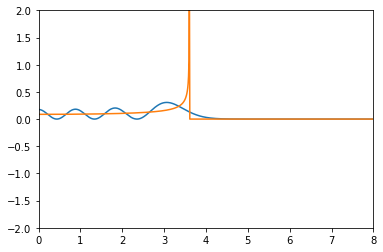

In [22]:
numberOfNodes = 6
energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
classicalProbabilityDensity = getClassicalProbabilityDensity(mesh, energy, harmonicPotential)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
print('')
plt.plot(mesh, y**2)
plt.plot(mesh, classicalProbabilityDensity)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-2, 2)
plt.show()

Number of nodes = 16, Energy = 16.500002145767212



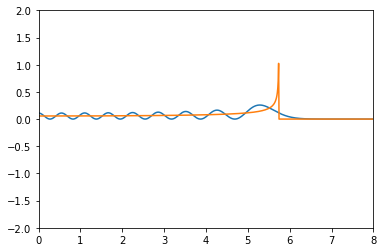

In [23]:
numberOfNodes = 16
energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
classicalProbabilityDensity = getClassicalProbabilityDensity(mesh, energy, harmonicPotential)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
print('')
plt.plot(mesh, y**2)
plt.plot(mesh, classicalProbabilityDensity)
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-2, 2)
plt.show()

Домашнее задание:

1) Построить и нарисовать СВ для разных n. (поместить на рисунок классическую плотность вероятности)

Number of nodes = 1, Energy = 1.500004529953003



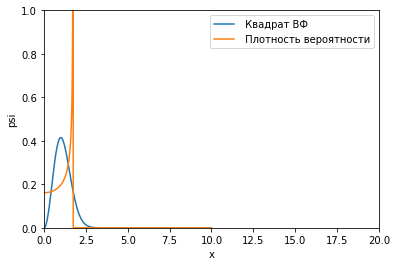

Number of nodes = 2, Energy = 2.5000035762786865



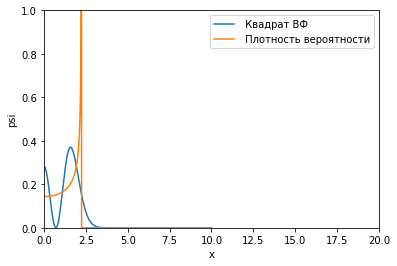

Number of nodes = 3, Energy = 3.50000262260437



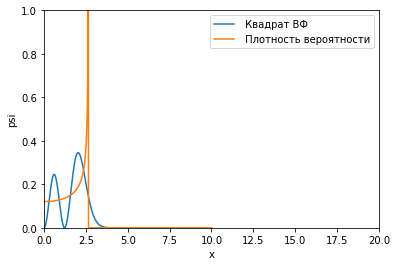

Number of nodes = 4, Energy = 4.500001668930054



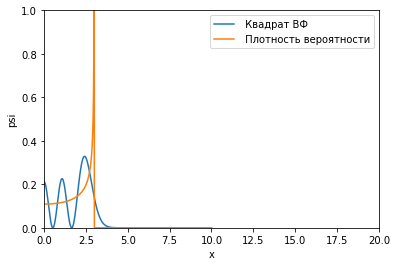

Number of nodes = 5, Energy = 5.500000715255737



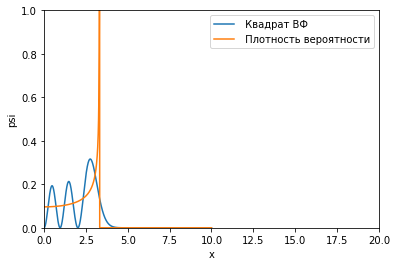

Number of nodes = 6, Energy = 6.499999761581421



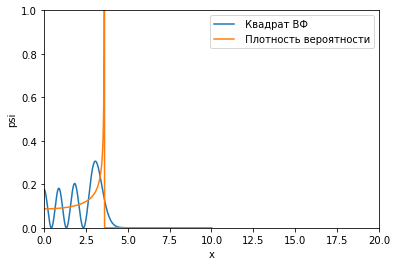

In [31]:
for number in range(1, 7): 
    numberOfNodes = number
    energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
    classicalProbabilityDensity = getClassicalProbabilityDensity(mesh, energy, harmonicPotential)
    print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
    print('')
    plt.plot(mesh, y**2,  label = ' Квадрат ВФ')
    plt.plot(mesh, classicalProbabilityDensity, label = ' Плотность вероятности')
    #plt.axhline(y=0.0, color='r', linestyle='-')
    plt.xlim(0, 20.0)
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('psi')
    plt.legend()
    plt.show()

На приведенных выше графиках четко видна точка поворота  $x_0$, в которой выполняется  условие  $E(x_0) = U(x_0)$. Эта точка соответствует пересечению синего (квадрат ВФ) и оранжевого (классическая плотность верояности) графиков.  
В рамках квантово-механического подхода вероятность нахождения частицы в области $x > x_0$  не нулевая. В этой области квадрат ВФ не 0.
В рамках классического подхода вероятность нахождения частицы в области $x > x_0$ нулевая. В этой области плотность верояности тождественный 0. Как и ожидалось, плотность вероятности максимальна в точке равновесия. 

2, 3)  Построить ВФ, полученные при задании энергии не равной допустимым значениям. Сравнить результаты при использовании алгоритма с обратным счетом и без.
 В данном случае взяли пример с $numberOfNodes = 7$, энергии  $E = 6.25$ и $E = 7.498$

Number of nodes = 7, Energy = 7.4999988079071045
Энергия, не соответствующая СЗ= 6.25
Энергия,  близкая СЗ= 7.4981689453125
Энергия, соответствующая СЗ= 7.4999988079071045


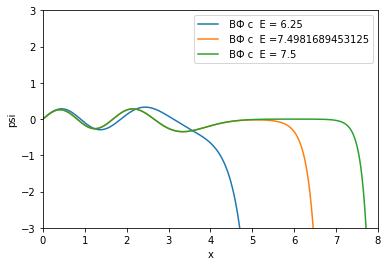

Number of nodes = 7, Energy = 7.4999988079071045
Энергия, не соответствующая СЗ= 6.25
Энергия,  близкая СЗ= 7.4981689453125
Энергия, соответствующая СЗ= 7.4999988079071045


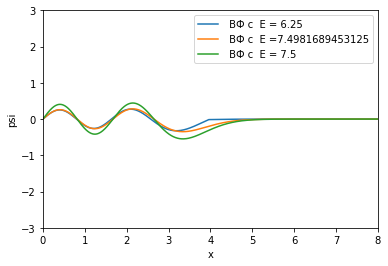

In [32]:
numberOfNodes = 7
# алгоритм без обратного счета
energy, y, energy_bad, y_bad, energy_close, y_close = shootingMethod(mesh, harmonicPotential, numberOfNodes, 
                           minEnergy=0.0, maxEnergy=100.0, tolerance=1E-5)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
print('Энергия, не соответствующая СЗ=' , energy_bad)
print('Энергия,  близкая СЗ=' , energy_close)
print('Энергия, соответствующая СЗ=' , energy)
plt.plot(mesh, y_bad, label = ' ВФ с  E = 6.25')
plt.plot(mesh, y_close, label = (' ВФ с  E ='+str(energy_close)))
plt.plot(mesh, y, label = ' ВФ с  E = 7.5')
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-3, 3)
plt.xlabel('x')
plt.ylabel('psi')
plt. legend()
plt.show()

#  алгоритм с обратным счетом 
energy, y, energy_bad, y_bad, energy_close, y_close = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
print('Number of nodes = {0}, Energy = {1}'.format(numberOfNodes, energy))
print('Энергия, не соответствующая СЗ=' , energy_bad)
print('Энергия,  близкая СЗ=' , energy_close)
print('Энергия, соответствующая СЗ=' , energy)
plt.plot(mesh, y_bad, label = ' ВФ с  E = 6.25')
plt.plot(mesh, y_close, label = (' ВФ с  E ='+str(energy_close)))
plt.plot(mesh, y, label = ' ВФ с  E = 7.5')
#plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0, 8.0)
plt.ylim(-3, 3)
plt.xlabel('x')
plt.ylabel('psi')
plt. legend()
plt.show()

Код без обратного хода:
Отчетливо видно, что ВФ не являются ограниченными, и соответсвенно не нормированы. Это некорректный результат, который противоречит постулатам КМ. 
По построенным графикам видно, чем ближе значения энергии, тем более похожи графики ВФ. Число узлов совпадает для трех графиков.

Код с обратным ходом:
В данном случае ВФ не расходятся на бесконечности. По построенным графикам так же видно, чем ближе значения энергии, тем более похожи графики ВФ. Число узлов совпадает для трех графиков. Чем ближе энергии к СЗ, тем более гладкая сшивка решений в точке равновесия.

4) Проанализировать эффекты, связанные с  $x_{max}, mesh$

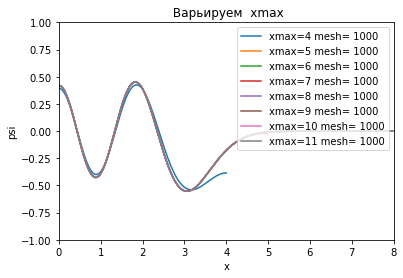

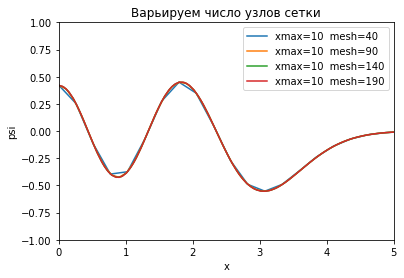

In [33]:
numberOfNodes = 6
for xmax in range(4, 12, 1):  
    mesh = np.linspace(0, xmax, 1000)
    energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
    plt.plot(mesh, y, label =  'xmax=' + str(xmax)+' '+ 'mesh='+' 1000')
plt.title(' Варьируем  xmax')
plt.xlim(0, 8)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('psi')
plt.legend(loc = 'upper right')
plt.show()
        
for number in range(40, 200, 50):
    mesh = np.linspace(0, 10, number)
    energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
    plt.plot(mesh, y, label = 'xmax='+'10 '+ ' '+'mesh='+str(number))
plt.title('Варьируем число узлов сетки')
plt.xlim(0, 5)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('psi')
plt.legend(loc = 'upper right')
plt.show()

Область от 0 до $x_{max}$ обязана включать точку поворота  $x_0$. Не имеет смысла задавать $x_{max}$ слишком большим ( много больше $x_0$), так как в этой области ВФ просто спадает по экспоненте  и ничего интересного для изучения не происходит. На первом графике видно, что ВФ некорректная только при $x_{max}$ = 4, для всех остальных значений ВФ с большой точностью совпадают. (для каждого numberOfNodes свое максимальное значение $x_{max}$, так как отличаются координаты точки поворота)

Число узлов сетки тоже не имеет смысл выбирать слишком большим. На втором графике видно, что ВФ некорректная только при $ mesh$ < 100, для всех остальных значений ВФ с большой точностью совпадают.  Для данной задачи имеет смысл выбирать сетку с переменным шагом -- в области до точки равновесия необходима более подробная сетка, в области после точки равновесия менее подробная (для экономии вычислительных мощностей)

5) Точность результата определяется величиной tolerance (abs(maxEnergy - minEnergy) < tolerance), которая по умолчанию равна  $10^{-5}$. Факторы влиящие на точность результата: tolerance, $x_{max}$, mesh.

   6)  Модифицировать потенциал  на двухъямный $V(x) = \epsilon*[(\frac{x}{\delta})^4 - 2*(\frac{x}{\delta})^2 + 1]$. Данный потенциал задается четной функцией, следовательно решения УШ - ВФ будут либо четными, либо нечетными функциями (как и для гармонического осциллятора). Следовательно, начальные условия будут такими же, как и в случае гармонического осциллятора; можно рассматривать область только x>0. 

In [27]:
def doublewellPotential(x):
    return pow(x,4) - 2*pow(x,2) + 1

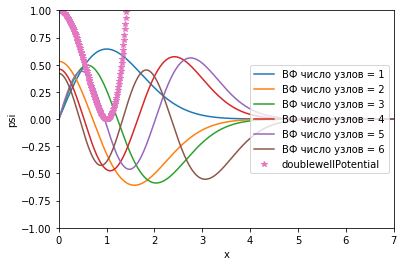

In [34]:
mesh = np.linspace(0, 10, 1000)
for numberOfNodes in range (1,7):
    energy, y = stitchingMethod(mesh, harmonicPotential, numberOfNodes)
    plt.plot(mesh, y, label = 'ВФ число узлов = '+ str(numberOfNodes))
   # classicalProbabilityDensity = getClassicalProbabilityDensity(mesh, energy, doublewellPotential)
   # plt.plot(mesh,classicalProbabilityDensity)
plt.plot(mesh, doublewellPotential(mesh), '*', label = 'doublewellPotential')
plt.xlim(0,7)
plt.legend(loc ='right')
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('psi')
plt.show()

 7) Модифицировать потенциал на Морзе  $V(x) = D*[\exp{(-2x)} - 2*\exp{(-x)}+1]$. Данный потенциал не коммутирует с оператором инверсии. Однако при достаточно малых по модулю x можно аппроксимировать данный потенциал гармоническим. И привести к уже решенной задаче. 
 
Изменения в коде:
Максимальную и минимальную энергии вычисляем как максимум и минимум энергий в области, где потенциал можно аппроксимировать гармоническим. Если D = 10, a =1 эта область соответствует $|x|<=2$. 
В области $|x|>=2$ ВФ гладко экспоненциально спадают. 

Заметим, что чем больше число узлов ВФ, тем шире необходим отрезок, для которого справедлива аппроксимация гарминическим потенциалом. Полученные значения энергии в данной задачи, как и ожидалось, не совпадают со значениями (n+$\frac{1}{2}$). 
 


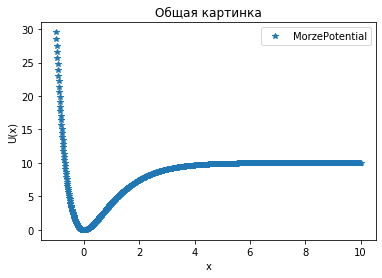

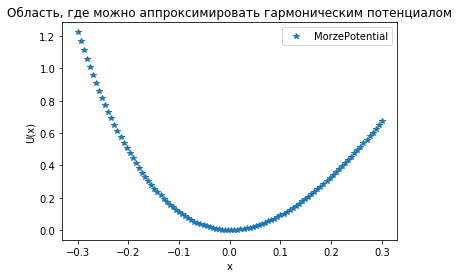

In [35]:
import math
def MorzePotential(x):
    D = 10
    a = 1
    return D*(np.exp((-2)*a*x)-2*np.exp((-1)*a*x)+1)

mesh = np.linspace(-1, 10, 1000)
plt.title('Общая картинка')
plt.plot(mesh, MorzePotential(mesh), '*', label = 'MorzePotential')
plt.legend(loc ='upper right')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.show()
plt.title('Область, где можно аппроксимировать гармоническим потенциалом')
mesh = np.linspace(-0.3, 0.3, 100)
plt.plot(mesh, MorzePotential(mesh), '*', label = 'MorzePotential')
plt.legend(loc ='upper right')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.show()

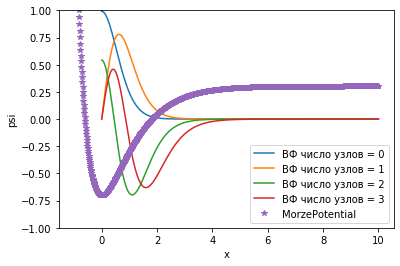

In [36]:
def Morze_stitchingMethod(mesh, potential, numberOfNodes, tolerance=1E-5, verbose=False):
    """
    """
    if verbose:
        print("Stiching Method...")
        print("(Number of iterations)(Energy)(Current number of half nodes)" 
              +"(Target number of half nodes)(Discontinuity)")
        
    deltaX = mesh[1] - mesh[0]
    halfNumberOfNodes = int(numberOfNodes / 2)
    numberOfIterations = 0
    # Set initial lower and upper bounds to the eigenvalue
    minEnergy = 10000
    maxEnergy = 0
    for i in range(len(mesh)):
        if (abs(mesh[i]) <= 3) and (potential(mesh[i]) < minEnergy):
            minEnergy = potential(mesh[i])
    for i in range(len(mesh)):
        if (abs(mesh[i]) <= 3) and (potential(mesh[i]) > maxEnergy):
            maxEnergy = potential(mesh[i])
    y = np.zeros(len(mesh))
          
    while True:
        numberOfIterations += 1
        energy = (minEnergy + maxEnergy) / 2.0
        g = 2.0 * (energy - potential(mesh))
        s = np.zeros(len(g))                               
        turningPointIndex = getTurningPointIndex(mesh, energy, potential)
        #print(minEnergy, maxEnergy, mesh[turningPointIndex])
        # Outward integration
        # Obtaining y on mesh[0:turningPointIndex] 
        if numberOfNodes % 2 == 0:        
            y0 = 1.0
            f0 = 1 + g[0] * deltaX**2 / 12.0
            f1 = 1 + g[1] * deltaX**2 / 12.0
            y1 = ((12.0 - 10.0 * f0) * y0) / (2.0 * f1)
        else:
            y0 = 0.0
            y1 = deltaX            
        y[:turningPointIndex+1] = numerovIntegrationScheme(g[:turningPointIndex+1],
                                                           s[:turningPointIndex+1],
                                                           y0, y1, deltaX)   
        yLeft = y[turningPointIndex]
        
        if verbose:
            formatString = "{0:10d}\t{1:10.10f}\t{2:5d}\t{3:5d}" 
            print(formatString.format(numberOfIterations, energy, 
                                      howManyNodes(y[:turningPointIndex+1]), halfNumberOfNodes))     
        
        if (howManyNodes(y[:turningPointIndex+1]) > halfNumberOfNodes):
            maxEnergy = energy
        elif (howManyNodes(y[:turningPointIndex+1]) < halfNumberOfNodes):
            minEnergy = energy
        else:
            # Inward integration 
            # Obtaining on mesh[turningPointIndex:]  
            y0 = deltaX
            y1 = deltaX       
            y[turningPointIndex:] = numerovIntegrationSchemeReverse(g[turningPointIndex:], 
                                                                    s[turningPointIndex:], y0, y1, deltaX)
            yRight = y[turningPointIndex]
            # Scaling wave function 
            y[turningPointIndex:] *= yLeft / yRight
            # Normalizing  wave fucntion
            y = normalizeWF(y, deltaX)
            # Calculate derivative discontinuity
            firstDerivativeDiscontinuity = getFirstDerivativeDiscontinuity(y, g, deltaX, turningPointIndex)                        
        
           
            if verbose:               
                formatString = "{0:10d}\t{1:10.10f}\t{2:5d}\t{3:5d}\t{4:10.10f}" 
                print(formatString.format(numberOfIterations, energy, 
                                          howManyNodes(y[:turningPointIndex+1]), halfNumberOfNodes, 
                                          firstDerivativeDiscontinuity))
            
            if (firstDerivativeDiscontinuity * y[turningPointIndex] <= 0):
                minEnergy = energy
            else: 
                maxEnergy = energy  
            
            if abs(maxEnergy - minEnergy) < tolerance:
                break
                
    return energy, y

#mesh = np.linspace(-0.3, 0.3, 100)
mesh = np.linspace(0, 10, 1000)
for numberOfNodes in range (0,4):
    #energy, y = Morze_shootingMethod(mesh, MorzePotential, numberOfNodes)
    energy, y = Morze_stitchingMethod(mesh, MorzePotential, numberOfNodes)
    #plt.plot(mesh, MorzePotential(mesh), 'b*', label = 'doublewellPotential')
    plt.plot(mesh, y, label = 'ВФ число узлов = '+ str(numberOfNodes))
new_mesh = np.linspace(-1, 10, 1000)
plt.plot(new_mesh, MorzePotential(new_mesh)/10 -0.7, '*', label = 'MorzePotential')
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('psi')
plt.legend(loc ='lower right')
plt.show()
